# [Taller 5] Minimos Cuadrados

Interpola los siguientes puntos:

- **p₁** = (5.4, 3.2)
- **p₂ᵢ** = (9.5, 0.7)
- **p₃** = (12.3, -3.6)

> De estos, el punto **p₂ᵢ** debe ser seleccionable y movible.

**Crea un programa que interpole una parábola en tiempo real para los tres puntos.**

SystemExit: 0

C:\Users\harry\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


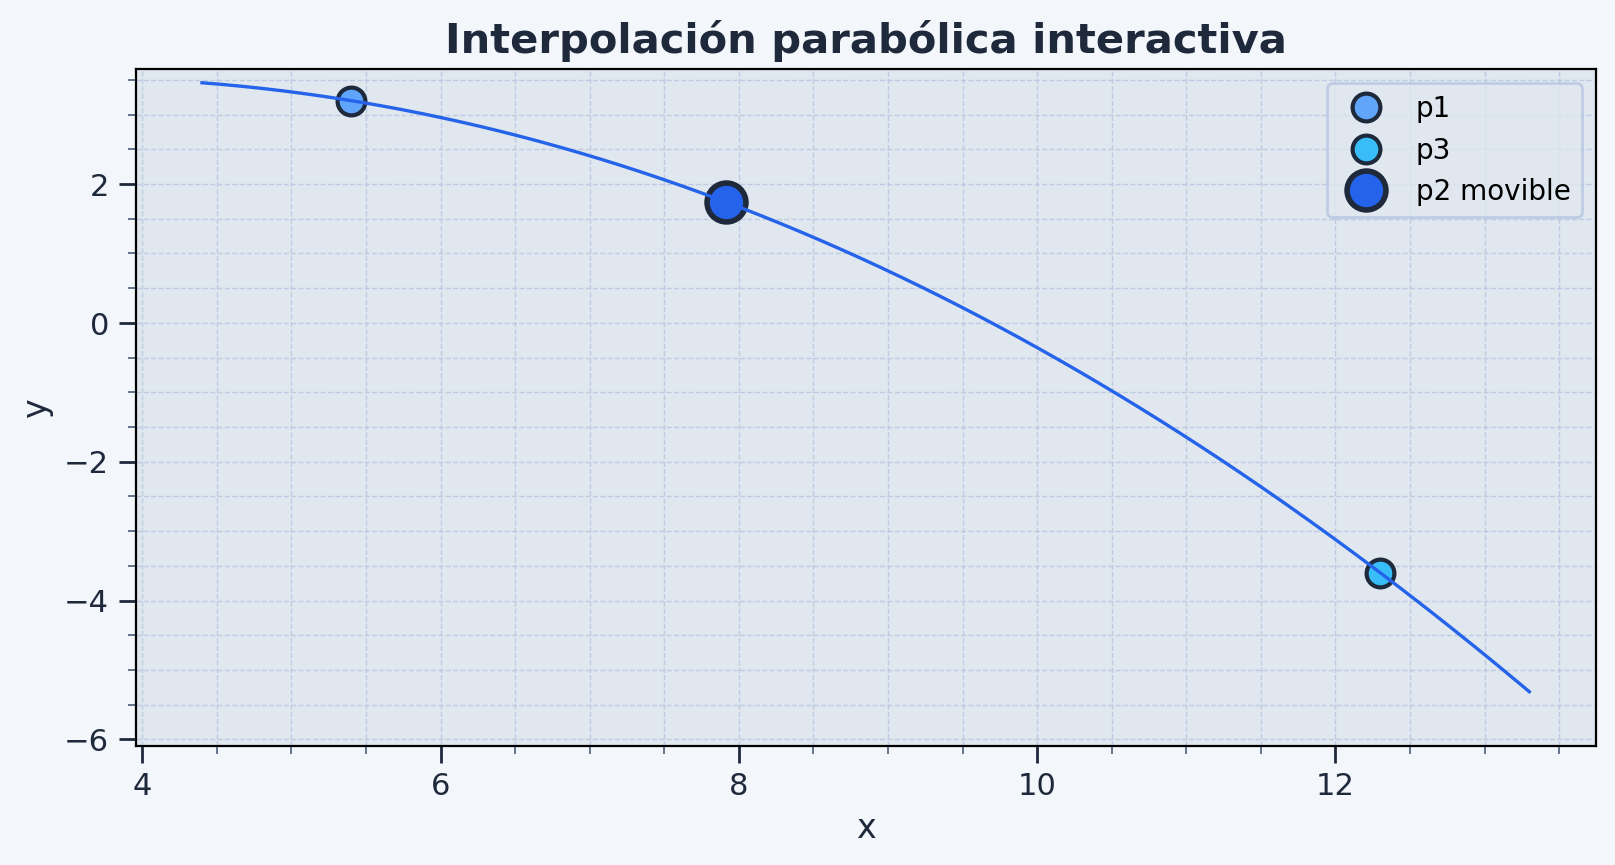

In [3]:
import sys
import numpy as np
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QLabel
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import matplotlib.pyplot as plt

class ParabolaPlot(QWidget):
    def __init__(self):
        super().__init__()
        self.p1 = [5.4, 3.2]
        self.p2 = [9.5, 0.7]
        self.p3 = [12.3, -3.6]
        self.dragging = False

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.fig)
        self.coord_label = QLabel(self)
        self.coord_label.setStyleSheet(
            "font-size: 13px; color: #1e293b; background: #e0e7ef; padding: 4px 10px; border-radius: 6px;"
        )
        self.coord_label.setFixedWidth(240)

        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.coord_label)
        self.setLayout(layout)

        # Estética profesional azul
        self.fig.patch.set_facecolor('#f3f6fa')
        self.ax.set_facecolor('#e0e7ef')

        self.ax.set_title("Interpolación parabólica interactiva", color="#1e293b", fontsize=15, weight='bold')
        self.ax.set_xlabel("x", color="#1e293b", fontsize=12)
        self.ax.set_ylabel("y", color="#1e293b", fontsize=12)

        # Cuadrícula fina y profesional
        self.ax.grid(True, which='both', color='#b6c6e0', linestyle='--', linewidth=0.5, alpha=0.8)
        self.ax.minorticks_on()
        self.ax.tick_params(axis='both', which='major', labelsize=11, colors="#1e293b", length=6, width=1)
        self.ax.tick_params(axis='both', which='minor', labelsize=9, colors="#64748b", length=3, width=0.7)

        # Mostrar los números en los ejes
        for label in (self.ax.get_xticklabels() + self.ax.get_yticklabels()):
            label.set_fontsize(11)
            label.set_color("#1e293b")
            label.set_visible(True)

        # Puntos fijos (azules)
        self.ax.plot(self.p1[0], self.p1[1], 'o', color='#60a5fa', markersize=10, label="p1", markeredgecolor='#1e293b', markeredgewidth=1.5)
        self.ax.plot(self.p3[0], self.p3[1], 'o', color='#38bdf8', markersize=10, label="p3", markeredgecolor='#1e293b', markeredgewidth=1.5)
        # Punto movible (azul más oscuro)
        self.p2_point, = self.ax.plot(self.p2[0], self.p2[1], 'o', color='#2563eb', markersize=14, label="p2 movible", markeredgecolor='#1e293b', markeredgewidth=2)

        self.x_parab = np.linspace(min(self.p1[0], self.p2[0], self.p3[0])-1,
                                   max(self.p1[0], self.p2[0], self.p3[0])+1, 400)
        self.y_parab = self.parabola([self.p1[0], self.p2[0], self.p3[0]],
                                     [self.p1[1], self.p2[1], self.p3[1]], self.x_parab)
        self.parab_line, = self.ax.plot(self.x_parab, self.y_parab, '-', lw=1.2, color='#2563eb')

        self.ax.legend(facecolor='#e0e7ef', edgecolor='#b6c6e0', fontsize=10)
        self.canvas.draw()

        self.cid_press = self.canvas.mpl_connect('button_press_event', self.on_press)
        self.cid_release = self.canvas.mpl_connect('button_release_event', self.on_release)
        self.cid_motion = self.canvas.mpl_connect('motion_notify_event', self.on_motion)

        # Mostrar coordenadas iniciales
        self.update_coord_label()

    def parabola(self, x, y, xp):
        A = np.vstack([np.power(x,2), x, np.ones(3)]).T
        a, b, c = np.linalg.solve(A, y)
        return a*np.array(xp)**2 + b*np.array(xp) + c

    def update_plot(self):
        self.p2_point.set_data([self.p2[0]], [self.p2[1]])
        y_parab = self.parabola([self.p1[0], self.p2[0], self.p3[0]],
                                [self.p1[1], self.p2[1], self.p3[1]], self.x_parab)
        self.parab_line.set_ydata(y_parab)
        self.canvas.draw_idle()
        self.update_coord_label()

    def update_coord_label(self):
        self.coord_label.setText(f"Coordenadas p2: x = {self.p2[0]:.2f}, y = {self.p2[1]:.2f}")

    def on_press(self, event):
        if event.inaxes != self.ax:
            return
        contains, _ = self.p2_point.contains(event)
        if contains:
            self.dragging = True

    def on_release(self, event):
        self.dragging = False

    def on_motion(self, event):
        if self.dragging and event.inaxes == self.ax and event.xdata and event.ydata:
            self.p2[0], self.p2[1] = event.xdata, event.ydata
            self.update_plot()

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Parábola Interactiva - PyQt5")
        self.setCentralWidget(ParabolaPlot())
        self.showMaximized()  # Abrir en ventana completa

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())

La pestaña  interactiva se encuentra en el .py
